# **IMPORTADO DE MÓDULOS**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from functions import (Calculate_CFD, create_position, plot_gaussian, get_gaussian_params,
                       calculate_gaussian_center_sigma, calculate_slope_y_intercept)

In [3]:
# Load data 
non_normalized_dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'
normalized_dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'

non_normalized_data = np.load(os.path.join(non_normalized_dir,'pulsos_Na22_filt_norm_practica_polyfit_sin_normalizar.npz'))['data']
normalized_data = np.load(os.path.join(normalized_dir, 'Na22_test_val.npz'))['data']

# **CFD**

In [25]:
fraction = 0.7
shift = 80
t_shift = 8
time_step = 0.2
new_time_step = time_step/EXTRASAMPLING

In [26]:
DATA_00 = new_data 
DATA_02 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = t_shift, NOISE = False)
DATA_20 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = t_shift, NOISE = False)
DATA_04 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = int(2*t_shift), NOISE = False)
DATA_40 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = int(2*t_shift), NOISE = False)


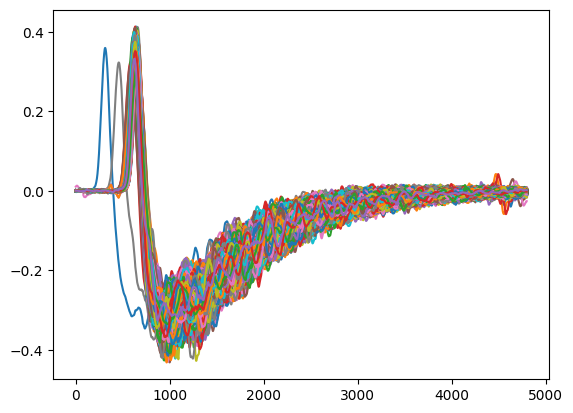

In [6]:
DATA_00_dec0 = constant_fraction_discrimination(DATA_00[:,:,0],  fraction = fraction, shift = shift)
DATA_00_dec1 = constant_fraction_discrimination(DATA_00[:,:,1],  fraction = fraction, shift = shift, plot = False)

DATA_02_dec0 = constant_fraction_discrimination(DATA_02[:,:,0],  fraction = fraction, shift = shift, plot = False)
DATA_02_dec1 = constant_fraction_discrimination(DATA_02[:,:,1],  fraction = fraction, shift = shift, plot = False)

DATA_20_dec0 = constant_fraction_discrimination(DATA_20[:,:,0],  fraction = fraction, shift = shift, plot = False)
DATA_20_dec1 = constant_fraction_discrimination(DATA_20[:,:,1],  fraction = fraction, shift = shift, plot = False)

DATA_04_dec0 = constant_fraction_discrimination(DATA_04[:,:,0],  fraction = fraction, shift = shift, plot = False)
DATA_04_dec1 = constant_fraction_discrimination(DATA_04[:,:,1],  fraction = fraction, shift = shift, plot = False)

DATA_40_dec0 = constant_fraction_discrimination(DATA_40[:,:,0],  fraction = fraction, shift = shift, plot = False)
DATA_40_dec1 = constant_fraction_discrimination(DATA_40[:,:,1],  fraction = fraction, shift = shift, plot = False)

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)          

# **RELATIVE LEADING EDGE** 

In [7]:
timestamps_RLE_dec0_DATA_00_list = []
timestamps_RLE_dec0_DATA_02_list = []
timestamps_RLE_dec0_DATA_20_list = []
timestamps_RLE_dec0_DATA_04_list = []
timestamps_RLE_dec0_DATA_40_list = []

timestamps_RLE_dec1_DATA_00_list = []
timestamps_RLE_dec1_DATA_02_list = []
timestamps_RLE_dec1_DATA_20_list = []
timestamps_RLE_dec1_DATA_04_list = []
timestamps_RLE_dec1_DATA_40_list = []


for i in range(DATA_00_fraction.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_00_fraction[i,:,0], new_time_step, threshold = 0.1)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_00_fraction[i,:,1], new_time_step, threshold = 0.1)
  timestamps_dec0_DATA_00_list.append(timestamp_dec0)
  timestamps_dec1_DATA_00_list.append(timestamp_dec1)

for i in range(DATA_02_fraction.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_02_fraction[i,:,0], new_time_step, threshold = 0.1)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_02_fraction[i,:,1], new_time_step, threshold = 0.1)
  timestamps_dec0_DATA_02_list.append(timestamp_dec0)
  timestamps_dec1_DATA_02_list.append(timestamp_dec1)

for i in range(DATA_20_fraction.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_20_fraction[i,:,0], new_time_step, threshold = 0.1)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_20_fraction[i,:,1], new_time_step, threshold = 0.1)
  timestamps_dec0_DATA_20_list.append(timestamp_dec0)
  timestamps_dec1_DATA_20_list.append(timestamp_dec1)

for i in range(DATA_04_fraction.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_04_fraction[i,:,0], new_time_step, threshold = 0.1)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_04_fraction[i,:,1], new_time_step, threshold = 0.1)
  timestamps_dec0_DATA_04_list.append(timestamp_dec0)
  timestamps_dec1_DATA_04_list.append(timestamp_dec1)

for i in range(DATA_40_fraction.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_40_fraction[i,:,0], new_time_step, threshold = 0.1)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_40_fraction[i,:,1], new_time_step, threshold = 0.1)
  timestamps_dec0_DATA_40_list.append(timestamp_dec0)
  timestamps_dec1_DATA_40_list.append(timestamp_dec1)

timestamps_RLE_dec0_DATA_00 = np.array(timestamps_RLE_dec0_DATA_00_list)
timestamps_RLE_dec0_DATA_02 = np.array(timestamps_RLE_dec0_DATA_02_list)
timestamps_RLE_dec0_DATA_20 = np.array(timestamps_RLE_dec0_DATA_20_list)
timestamps_RLE_dec0_DATA_04 = np.array(timestamps_RLE_dec0_DATA_04_list)
timestamps_RLE_dec0_DATA_40 = np.array(timestamps_RLE_dec0_DATA_40_list)

timestamps_dec1_DATA_00 = np.array(timestamps_dec1_DATA_00_list)
timestamps_dec1_DATA_02 = np.array(timestamps_dec1_DATA_02_list)
timestamps_dec1_DATA_20 = np.array(timestamps_dec1_DATA_20_list)
timestamps_dec1_DATA_04 = np.array(timestamps_dec1_DATA_04_list)
timestamps_dec1_DATA_40 = np.array(timestamps_dec1_DATA_40_list)


# **FULL TOF**

V40: CENTROID(ns) = 0.4001 +/- 0.00142  FWHM(ns) = 0.2599 +/- 0.00155
V20: CENTROID(ns) = 0.1996 +/- 0.00151  FWHM(ns) = 0.2591 +/- 0.00165
V00: CENTROID(ns) = -0.0003 +/- 0.00172  FWHM(ns) = 0.2594 +/- 0.00188
V02: CENTROID(ns) = -0.2002 +/- 0.00153  FWHM(ns) = 0.2597 +/- 0.00167
V04: CENTROID(ns) = -0.4006 +/- 0.00145  FWHM(ns) = 0.2592 +/- 0.00158



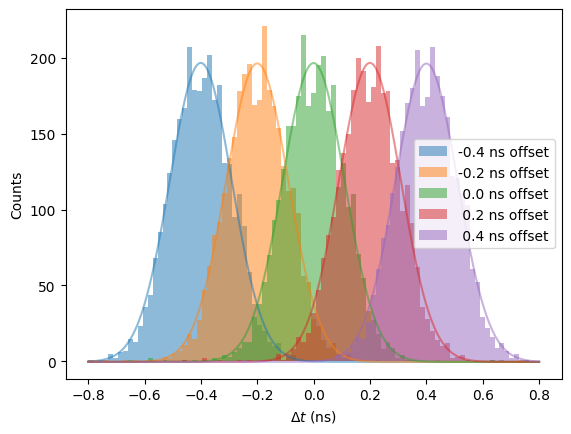

In [8]:
TOF_V00 = timestamps_RLE_dec0_DATA_00 - timestamps_RLE_dec1_DATA_00
TOF_V02 = timestamps_RLE_dec0_DATA_02 - timestamps_RLE_dec1_DATA_02
TOF_V20 = timestamps_RLE_dec0_DATA_20 - timestamps_RLE_dec1_DATA_20
TOF_V04 = timestamps_RLE_dec0_DATA_04 - timestamps_RLE_dec1_DATA_04
TOF_V40 = timestamps_RLE_dec0_DATA_40 - timestamps_RLE_dec1_DATA_40

#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_V00[None,:], np.zeros((TOF_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)


params_V04, errors_V04 = get_gaussian_params(TOF_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [9]:
error_V02 = abs((TOF_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
error_V00 = abs((TOF_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
error_V04 = abs((TOF_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
error_V40 = abs((TOF_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)  

0.09565390733573444


# **D-LED**

In [10]:
data_hist_V82 = '/home/josea/ResultGenetico/hist-co-8cm-2cm-gate.txt'
data_hist_V55 = '/home/josea/ResultGenetico/hist-co-5cm-5cm-gate.txt'
data_hist_V28 = '/home/josea/ResultGenetico/hist-co-2cm-8cm-gate.txt'

bins_V82, histog_V82,_ = np.loadtxt(data_hist_V82, dtype = str, unpack = True, skiprows= 4) 
bins_V55, histog_V55,_ = np.loadtxt(data_hist_V55, dtype = str, unpack = True, skiprows= 4)
bins_V28, histog_V28,_ = np.loadtxt(data_hist_V28, dtype = str, unpack = True, skiprows= 4)

histog_V82 = histog_V82.astype(float)
histog_V55 = histog_V55.astype(float)
histog_V28 = histog_V28.astype(float)

bins_V82 = bins_V82.astype(float)
bins_V55 = bins_V55.astype(float)
bins_V28 = bins_V28.astype(float)

In [11]:
new_histog_V82 = []
new_bins_V82 = []

new_histog_V55 = []
new_bins_V55 = []

new_histog_V28 = []
new_bins_V28 = []


for i in range(len(bins_V82)):
    for j in range(int(histog_V82[i])):
        new_histog_V82.append(1)
        new_bins_V82.append(bins_V82[i])
    

for i in range(len(bins_V55)):
    for j in range(int(histog_V55[i])):
        new_histog_V55.append(1)
        new_bins_V55.append(bins_V55[i])


for i in range(len(bins_V28)):
    for j in range(int(histog_V28[i])):
        new_histog_V28.append(1)
        new_bins_V28.append(bins_V28[i])


new_histog_V82 = np.array(new_histog_V82, dtype = 'float64')
new_bins_V82 = np.array(new_bins_V82, dtype = 'float64')

new_histog_V55 = np.array(new_histog_V55, dtype = 'float64')
new_bins_V55 = np.array(new_bins_V55, dtype = 'float64')

new_histog_V28 = np.array(new_histog_V28, dtype = 'float64')
new_bins_V28 = np.array(new_bins_V28, dtype = 'float64')

In [12]:
TOFN_V82 = new_histog_V82*new_bins_V82
TOFN_V55 = new_histog_V55*new_bins_V55
TOFN_V28 = new_histog_V28*new_bins_V28

In [13]:
#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
nbins = 52
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOFN_V55[None,:], np.zeros((TOFN_V55.shape[0])), nbins = nbins) 

print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

NameError: name 'plot_gaussian_and_get_params' is not defined

In [ ]:
error_V02 = abs((TOF_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
error_V00 = abs((TOF_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
error_V04 = abs((TOF_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
error_V40 = abs((TOF_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)                                                                                                               

0.06368897714993829
